In [0]:
"""
Amadeus Challenge : Data Scientist Position
Author            : Angeloni Julien
Date Creation     : 11/08/2018

Third exercise - Plot the monthly number of searches for flights arriving at
                  * Malaga
                  * Madrid
                  * Barcelona

Data              : searches.csv
"""

In [0]:
#LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

import re

In [2]:
#IMPORT FILE
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
#GLOBAL VARIABLES
SEARCHES = '/content/gdrive/My Drive/Colab Notebooks/searches.csv'

#DATAFRAME STRUCTURE
cols = ['Date','Destination','NbSegments','Seg1Date','Seg2Date','Seg3Date','Seg4Date','Seg5Date','Seg6Date', 'Seg2Arrival']
SEARCHES_DF_DEST = pd.read_csv(SEARCHES, error_bad_lines=False, encoding='UTF8', sep='^', usecols=cols)


In [9]:
SEARCHES_DF_DEST

,Date,Destination,NbSegments,Seg1Date,Seg2Arrival,Seg2Date,Seg3Date,Seg4Date,Seg5Date,Seg6Date
0,2013-01-01,AUH,2.0,2013-01-26,TXL,2013-02-02,NaN,NaN,NaN,NaN
1,2013-01-01,MIL,1.0,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,SFO,2.0,2013-08-02,ICT,2013-08-09,NaN,NaN,NaN,NaN
3,2013-01-01,ARN,1.0,2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,MAD,2.0,2013-03-22,OSL,2013-03-31,NaN,NaN,NaN,NaN
5,2013-01-01,BLR,2.0,2013-02-14,IAH,2013-02-23,NaN,NaN,NaN,NaN
6,2013-01-01,PAR,2.0,2013-03-02,CPH,2013-03-07,NaN,NaN,NaN,NaN
7,2013-01-01,DUB,2.0,2013-02-12,PAR,2013-02-17,NaN,NaN,NaN,NaN
8,2013-01-01,ACE,2.0,2013-03-30,DUS,2013-04-06,NaN,NaN,NaN,NaN
9,2013-01-01,BGW,2.0,2013-02-26,FRA,2013-04-08,NaN,NaN,NaN,NaN


Data Analysis :

We want the total of destinations for all destination ariports monthly. 
Viewing the results of our previous selection, we understand that :


*   Destination does not correpond to the final segment
*   NbSegments correpsponds to the number of segments for the travel
*   SegNDate correpond to the date the plane has arrived in the segment



In [0]:
#DATAFRAME STRUCTURE
cols = ['Date','Time','From','Seg1Departure','Seg1Arrival','Seg2Departure','Seg2Arrival','Destination']
SEARCHES_DF_DEST = pd.read_csv(SEARCHES, error_bad_lines=False, encoding='UTF8', sep='^', usecols=cols)

In [11]:
SEARCHES_DF_DEST

,Date,Time,Destination,Seg1Departure,Seg1Arrival,Seg2Departure,Seg2Arrival,From
0,2013-01-01,20:25:57,AUH,TXL,AUH,AUH,TXL,1ASIWS
1,2013-01-01,10:15:33,MIL,ATH,MIL,NaN,NaN,1ASIWS
2,2013-01-01,18:04:49,SFO,ICT,SFO,SFO,ICT,1ASIWS
3,2013-01-01,17:42:40,ARN,RNB,ARN,NaN,NaN,1ASI
4,2013-01-01,17:48:29,MAD,OSL,MAD,MAD,OSL,1ASIWS
5,2013-01-01,22:00:28,BLR,IAH,BLR,BLR,IAH,1ASIWS
6,2013-01-01,10:47:14,PAR,CPH,PAR,PAR,CPH,1ASI
7,2013-01-01,23:39:49,DUB,PAR,DUB,DUB,PAR,1ASIWS
8,2013-01-01,17:08:46,ACE,DUS,ACE,ACE,DUS,1ASIWS
9,2013-01-01,19:57:57,BGW,FRA,BGW,BGW,FRA,1ASI


Data Analysis :

Viewing the results of our previous selection, we understand that :


*   A 'Segment' is a one-way travel or a return travel on a specific overhead line

As we are in the "searches" file, we will use only "Date" to get the number of search for a destination airport monthly.

Finaly, we will only use "Date" and "Destination" fields. We will select only one corresponding to the three airports selected.

In [0]:
#GENERATE USEFULL STRUCTURE
cols = ['Date','Destination']
SEARCHES_DF_DEST = pd.read_csv(SEARCHES, error_bad_lines=False, encoding='UTF8', sep='^', usecols=cols)

In [16]:
SEARCHES_DF_DEST

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD
5,2013-01-01,BLR
6,2013-01-01,PAR
7,2013-01-01,DUB
8,2013-01-01,ACE
9,2013-01-01,BGW


In [20]:
#CREATE REGEX TO GET MONTH FROM "DATE"
reg = r'(2013)\-(\d*)\-(\d*)'

'''
  Thanks to our previous dataframe, we know that month is at the second place in
  the "Date" field.
'''

'\n  Thanks to our previous dataframe, we know that month is at the second place in\n  the "Date" field.\n'

In [25]:
#TEST OUR REGEX
m = re.search(reg, "2013-10-20")
print("Expected: 10, Found: ", m.group(2))

m = re.search(reg, "2013-150-20")
print("Expected: 150, Found: ", m.group(2))

'''
  We have tested our regex on wrong results at https://regex101.com/
'''

('Expected: 10, Found: ', '10')
('Expected: 150, Found: ', '150')


'\n  We have tested our regex on wrong results at https://regex101.com/\n'

In [35]:
def get_month(date):
  """
    Function to get the month from a date if YMD format
    
    @date   : the date to extract month
    
    @return : an int concerning the month found
  """
  
  date = str(date)
  
  m = re.search(reg, date)
  
  return m.group(2)

#TEST FUNCTION

print(get_month("2013-10-20"))

 10


In [0]:
#MODIFY THE "Date" FIELD BY THE MONTH NUMBER
SEARCHES_DF_DEST['Date'] = SEARCHES_DF_DEST['Date'].apply(lambda x: get_month(x))

In [63]:
#CHECK THE RESULT
SEARCHES_DF_DEST

,Date,Destination
0,01,AUH
1,01,MIL
2,01,SFO
3,01,ARN
4,01,MAD
5,01,BLR
6,01,PAR
7,01,DUB
8,01,ACE
9,01,BGW


We need now to keep only the airports we want to analyze:
    * Malaga    : AGP
    * Madrid    : MAD
    * Barcelona : BCN
    
  We found the IATA code using this website : 
  http://fr.whattheflight.com/aeroports/codes-iata-oaci/

In [0]:
#KEEP ROWS ONLY WITH SELECTED IATA CODE
iata_list = ['AGP','MAD','BCN']

SEARCHES_DF_DEST = SEARCHES_DF_DEST[SEARCHES_DF_DEST['Destination'].isin(iata_list)]

In [0]:
#CHECK RESULT
SEARCHES_DF_DEST

#RESET INDEX

SEARCHES_DF_DEST = SEARCHES_DF_DEST.reset_index()


In [82]:
SEARCHES_DF_DEST

,index,Date,Destination
0,4,01,MAD
1,93,01,AGP
2,113,01,BCN
3,147,01,AGP
4,151,01,MAD
5,165,01,BCN
6,177,01,BCN
7,186,01,BCN
8,188,01,BCN
9,208,01,BCN


Now we have only AGP, MAD, BCN airports, we have to group by date and by iata code, and count it.

In [0]:
#GROUP BY MONTH AND IATA CODE
FINAL_STR = SEARCHES_DF_DEST.groupby(['Date', 'Destination']).count().unstack()

In [142]:
FINAL_STR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 01 to 12
Data columns (total 3 columns):
(index, AGP)    12 non-null int64
(index, BCN)    12 non-null int64
(index, MAD)    12 non-null int64
dtypes: int64(3)
memory usage: 384.0+ bytes


We have now our final structure to use for plot a graph per month.

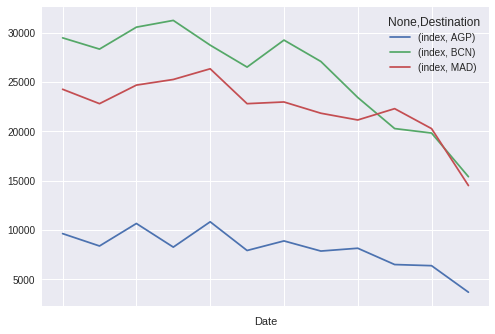

In [141]:
#PLOT PART
#Note we have never tried to plot directly with pandas

ax = FINAL_STR.plot(kind="line")

We now have the representation per month for the three airports selected.

We have some issues :

*   Legend, with a None index, probably from the dataframe structure
*   x legend shows "Date", and not the number of the month (but it still understandable)

